In [11]:
#!pip install sqlalchemy
#!pip install mysql-connector


# installing the mysql-connector-python package
!pip install mysql-connector-python
#pip install mysql-connector

# upgrade the package
#pip install --upgrade mysql-connector
#pip install --upgrade mysql-connector-python 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 14.4 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd

#import sqlite3
import sqlite3 as sq3
from sqlite3 import Connection

import sqlalchemy.pool as pool

### ERROR - plugin d'authentification caching_sha2_password n'est pas pris en charge par votre installation de MySQL

L'erreur que vous rencontrez indique que le plugin d'authentification caching_sha2_password n'est pas pris en charge par votre installation de MySQL Connector/Python.

Pour résoudre ce problème, vous pouvez soit modifier la configuration de l'utilisateur MySQL pour utiliser un plugin d'authentification pris en charge, soit modifier la configuration de la connexion MySQL Connector/Python pour utiliser un plugin d'authentification pris en charge.

Solution 1: Modifier la configuration de l'utilisateur MySQL
Connectez-vous à MySQL en tant qu'utilisateur avec les privilèges nécessaires et modifiez l'utilisateur pour utiliser un plugin d'authentification pris en charge. Par exemple, vous pouvez modifier l'utilisateur awf pour utiliser le plugin d'authentification mysql_native_password :


```sql
# Connect to the MySQL server using the root user and password
mysql -u root -p 
# Enter password: ********


ALTER USER 'awf'@'localhost' IDENTIFIED WITH mysql_native_password BY 'nouveau_mot_de_passe';

ALTER USER 'awf'@'localhost' IDENTIFIED WITH mysql_native_password BY 'awf';

-- sans modification du mdp
ALTER USER 'awf'@'localhost' IDENTIFIED WITH mysql_native_password;

```

In [5]:
#!sqlite3 mydatabase.db < synergix_dataset.sql

In [18]:
import pandas as pd
import mysql.connector
import warnings

# Filter out pandas UserWarning
warnings.filterwarnings("ignore", category=UserWarning)


# Modify these parameters according to your MySQL configuration
mysql_config = {
    'host': 'localhost',
    'database': 'food_delivery',
    'user': 'awf',
    'password': 'awf',
     'auth_plugin': 'mysql_native_password'
}

# Establish connection
connection = mysql.connector.connect(**mysql_config)


# Query to fetch table names
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = %s"
table_schema = (mysql_config['database'],)  # Using the configured database name
cursor = connection.cursor()
cursor.execute(query, table_schema)

# Fetch all table names
table_names = cursor.fetchall()

# Convert the result to a pandas DataFrame for easier viewing
#df = pd.DataFrame(table_names, columns=['Table Name'])
for tb in table_names:
    print(tb)

('customers',)
('drivers',)
('food_items',)
('orders',)
('orders_items',)
('restaurants',)


In [28]:
#connection

In [26]:
query = "SELECT * FROM customers"
df = pd.read_sql(query, connection)
print(df.shape)
df.head(3)

(10000, 5)


,customer_id,first_name,last_name,phone_number,address
0,1,Donald,Arend,9020474801,49 Madison Avenue
1,2,Richard,Krick,7040231632,32 Vineyard Drive
2,3,Pauline,Hardman,9180289990,18 Elmwood Place


In [33]:
query = "SELECT * FROM food_items"
df = pd.read_sql(query, connection)
print(df.shape)
df.head(3)

(314, 6)


,item_id,restaurant_id,item_name,food_type,price,calories
0,101,47,Coconut Ice Cream,vegetarian,NaN,500.0
1,102,93,Vegetable Pakoras,Veg,NaN,1000.0
2,103,24,Wonton soup,non-vegetarian,NaN,400.0


In [36]:
df.describe()

,item_id,restaurant_id,calories
count,314.000000,314.000000,291.00000
mean,257.500000,53.108280,601.28866
std,90.788215,28.050748,337.12395
min,101.000000,1.000000,80.00000
25%,179.250000,30.000000,400.00000
50%,257.500000,56.000000,500.00000
75%,335.750000,74.000000,800.00000
max,414.000000,100.000000,1600.00000


In [34]:
df.describe(include=object)

,item_name,food_type,price
count,314,314,314
unique,173,7,1
top,Peking duck,Non-veg,NaN
freq,10,143,314


In [35]:
df["food_type"].value_counts()

food_type
Non-veg           143
Veg                56
Non-Veg            54
non-veg            25
veg                20
vegetarian          8
non-vegetarian      8
Name: count, dtype: int64

In [37]:
query = "SELECT * FROM restaurants"
df = pd.read_sql(query, connection)
print(df.shape)
df.head(3)

(100, 4)


,restaurant_id,restaurant_name,cuisine,address
0,1,L'Artusi,Italian,"""3540 7th Ave"
1,2,Loring Place,Chinese,"""6947 4th Ave"
2,3,Café China,Chinese,"""9675 7th Ave"


In [38]:
df.describe(include=object)

,restaurant_name,cuisine,address
count,100,100,100
unique,96,4,100
top,Via Carota,Italian,"""3540 7th Ave"
freq,3,38,1


In [39]:
df['cuisine'].value_counts()

cuisine
Italian    38
Chinese    29
Thai       18
Indian     15
Name: count, dtype: int64

In [40]:
query = "SELECT * FROM drivers"
df = pd.read_sql(query, connection)
print(df.shape)
df.head(3)

(250, 3)


,driver_id,name,rating
0,1,Avery Yost,3.1
1,2,Anthony Pegram,4.3
2,3,Elaine Kimes,4.2


In [41]:
df.describe(include=object)

,name
count,250
unique,250
top,Avery Yost
freq,1


In [42]:
query = "SELECT * FROM orders"
df = pd.read_sql(query, connection)
print(df.shape)
df.head(3)

(43118, 13)


,order_id,customer_id,order_date,order_time,delivered_date,delivered_time,delivery_address,driver_id,total_price,delivery_fee,discount,final_price,order_rating
0,1,7420,2022-06-01,0 days 00:03:00,2022-06-01,0 days 00:16:00,7 Cedar Lane,93,150,0.0,30.0,120.0,3.555464
1,2,1895,2022-06-01,0 days 00:04:00,2022-06-01,0 days 00:18:00,7 Lexington Place,138,9,5.0,0.0,14.0,5.000000
2,3,6651,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:20:00,20 Linden Lane,187,117,0.0,23.4,93.6,3.393489


In [44]:
#  Data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43118 entries, 0 to 43117
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          43118 non-null  int64          
 1   customer_id       43118 non-null  int64          
 2   order_date        43118 non-null  datetime64[ns] 
 3   order_time        43118 non-null  timedelta64[ns]
 4   delivered_date    43118 non-null  object         
 5   delivered_time    43118 non-null  timedelta64[ns]
 6   delivery_address  43118 non-null  object         
 7   driver_id         43118 non-null  int64          
 8   total_price       43118 non-null  int64          
 9   delivery_fee      43118 non-null  float64        
 10  discount          43118 non-null  float64        
 11  final_price       43118 non-null  float64        
 12  order_rating      43118 non-null  float64        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2), timede

In [45]:
# observe the values in Date column - they are all in uniform format
df['delivered_date'] = pd.to_datetime(df['delivered_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43118 entries, 0 to 43117
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          43118 non-null  int64          
 1   customer_id       43118 non-null  int64          
 2   order_date        43118 non-null  datetime64[ns] 
 3   order_time        43118 non-null  timedelta64[ns]
 4   delivered_date    43118 non-null  datetime64[ns] 
 5   delivered_time    43118 non-null  timedelta64[ns]
 6   delivery_address  43118 non-null  object         
 7   driver_id         43118 non-null  int64          
 8   total_price       43118 non-null  int64          
 9   delivery_fee      43118 non-null  float64        
 10  discount          43118 non-null  float64        
 11  final_price       43118 non-null  float64        
 12  order_rating      43118 non-null  float64        
dtypes: datetime64[ns](2), float64(4), int64(4), object(1), timede

In [43]:
df.shape

(43118, 13)

In [31]:
df.describe()

,order_id,customer_id,order_date,order_time,delivered_time,driver_id,total_price,delivery_fee,discount,final_price,order_rating
count,43118.00000,43118.000000,43118,43118,43118,43118.000000,43118.00000,43118.000000,43118.000000,43118.000000,43118.000000
mean,21559.50000,5017.293682,2022-07-27 00:03:44.425993984,0 days 10:59:53.955192726,0 days 11:23:19.883575304,125.432372,28.51540,3.058096,3.796094,27.777402,3.628894
min,1.00000,1.000000,2022-06-01 00:00:00,0 days 00:00:00,0 days 00:10:00,1.000000,3.00000,0.000000,0.000000,8.000000,0.993210
25%,10780.25000,2517.000000,2022-06-26 00:00:00,0 days 05:30:00,0 days 05:53:00,62.000000,10.00000,0.000000,0.000000,15.000000,2.735476
50%,21559.50000,5043.000000,2022-07-24 00:00:00,0 days 11:00:00,0 days 11:23:00,126.000000,18.00000,5.000000,1.800000,21.200000,3.740086
75%,32338.75000,7539.000000,2022-08-25 00:00:00,0 days 16:31:00,0 days 16:53:00,188.000000,33.00000,5.000000,4.800000,28.800000,4.732113
max,43118.00000,10000.000000,2022-09-29 00:00:00,0 days 21:59:00,0 days 22:40:00,250.000000,150.00000,5.000000,30.000000,120.000000,5.000000
std,12447.23879,2891.634065,NaN,0 days 06:20:46.454223400,0 days 06:20:49.031265675,72.460988,29.60957,2.189277,5.792587,22.894097,1.128312


In [46]:
df.describe(include=object)

,delivery_address
count,43118
unique,9874
top,68 Meadowbrook Road
freq,14


In [48]:
df.describe(include=["datetime64", "timedelta64"])

,order_date,order_time,delivered_date,delivered_time
count,43118,43118,43118,43118
mean,2022-07-27 00:03:44.425993984,0 days 10:59:53.955192726,2022-07-27 00:03:44.425993984,0 days 11:23:19.883575304
min,2022-06-01 00:00:00,0 days 00:00:00,2022-06-01 00:00:00,0 days 00:10:00
25%,2022-06-26 00:00:00,0 days 05:30:00,2022-06-26 00:00:00,0 days 05:53:00
50%,2022-07-24 00:00:00,0 days 11:00:00,2022-07-24 00:00:00,0 days 11:23:00
75%,2022-08-25 00:00:00,0 days 16:31:00,2022-08-25 00:00:00,0 days 16:53:00
max,2022-09-29 00:00:00,0 days 21:59:00,2022-09-29 00:00:00,0 days 22:40:00
std,NaN,0 days 06:20:46.454223400,NaN,0 days 06:20:49.031265675


In [54]:
df.describe(include=["int64", "float64"])

,order_id,customer_id,driver_id,total_price,delivery_fee,discount,final_price,order_rating
count,43118.00000,43118.000000,43118.000000,43118.00000,43118.000000,43118.000000,43118.000000,43118.000000
mean,21559.50000,5017.293682,125.432372,28.51540,3.058096,3.796094,27.777402,3.628894
std,12447.23879,2891.634065,72.460988,29.60957,2.189277,5.792587,22.894097,1.128312
min,1.00000,1.000000,1.000000,3.00000,0.000000,0.000000,8.000000,0.993210
25%,10780.25000,2517.000000,62.000000,10.00000,0.000000,0.000000,15.000000,2.735476
50%,21559.50000,5043.000000,126.000000,18.00000,5.000000,1.800000,21.200000,3.740086
75%,32338.75000,7539.000000,188.000000,33.00000,5.000000,4.800000,28.800000,4.732113
max,43118.00000,10000.000000,250.000000,150.00000,5.000000,30.000000,120.000000,5.000000


In [50]:
df.isna().sum()

order_id            0
customer_id         0
order_date          0
order_time          0
delivered_date      0
delivered_time      0
delivery_address    0
driver_id           0
total_price         0
delivery_fee        0
discount            0
final_price         0
order_rating        0
dtype: int64

In [115]:
df['final_price']

0        120.0
1         14.0
2         93.6
3         84.0
4         24.1
         ...  
43113     43.2
43114     25.9
43115     81.6
43116     25.9
43117     11.0
Name: final_price, Length: 43118, dtype: float64

<Axes: >

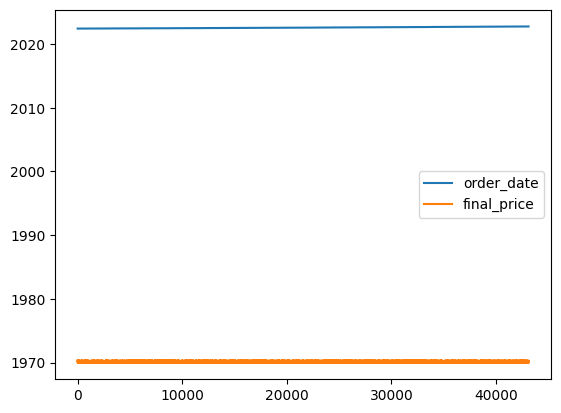

In [117]:
df[['order_date', 'final_price']].plot()

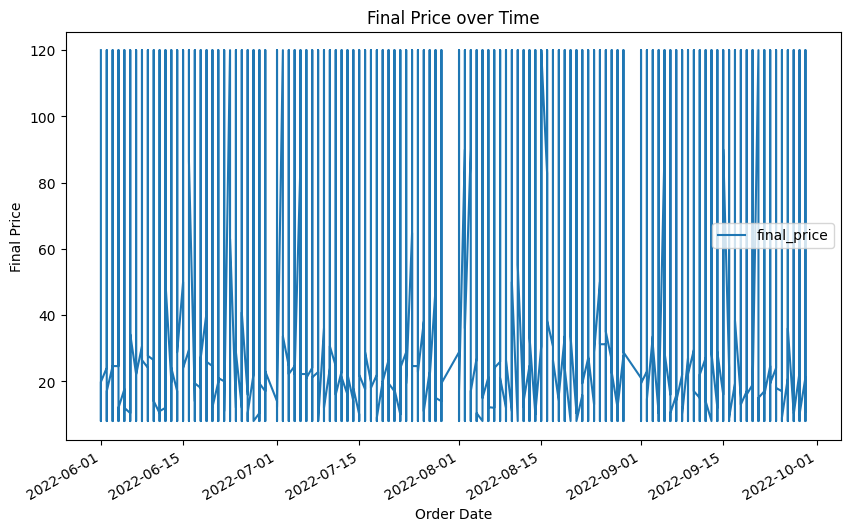

In [118]:
import matplotlib.pyplot as plt

# Plot a line chart of date against final price
df.plot(x='order_date', y='final_price', figsize=(10, 6))
plt.xlabel('Order Date')
plt.ylabel('Final Price')
plt.title('Final Price over Time')
plt.show()

In [80]:
df['order_date'].value_counts().head(10)

order_date
2022-06-19    467
2022-06-29    465
2022-06-09    459
2022-06-26    457
2022-06-01    454
2022-06-21    450
2022-06-04    444
2022-06-08    442
2022-06-05    439
2022-06-15    439
Name: count, dtype: int64

In [58]:
#df['delivered_date'].value_counts().plot()

<Axes: xlabel='order_date'>

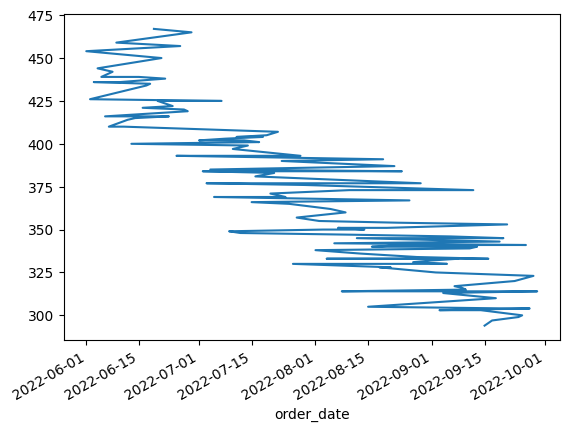

In [82]:
#df['order_date'].value_counts().plot(kind="line")
df['order_date'].value_counts().plot(kind="line")

<Axes: xlabel='order_date'>

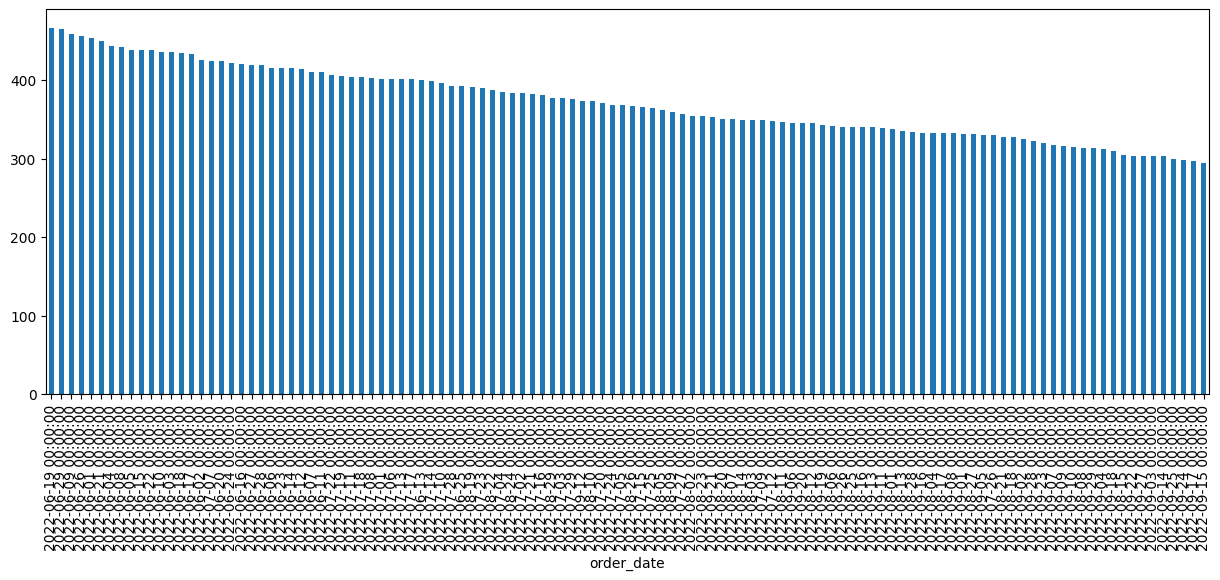

In [88]:
df['order_date'].value_counts().plot(kind="bar", figsize=(15, 5))

<Axes: xlabel='order_date'>

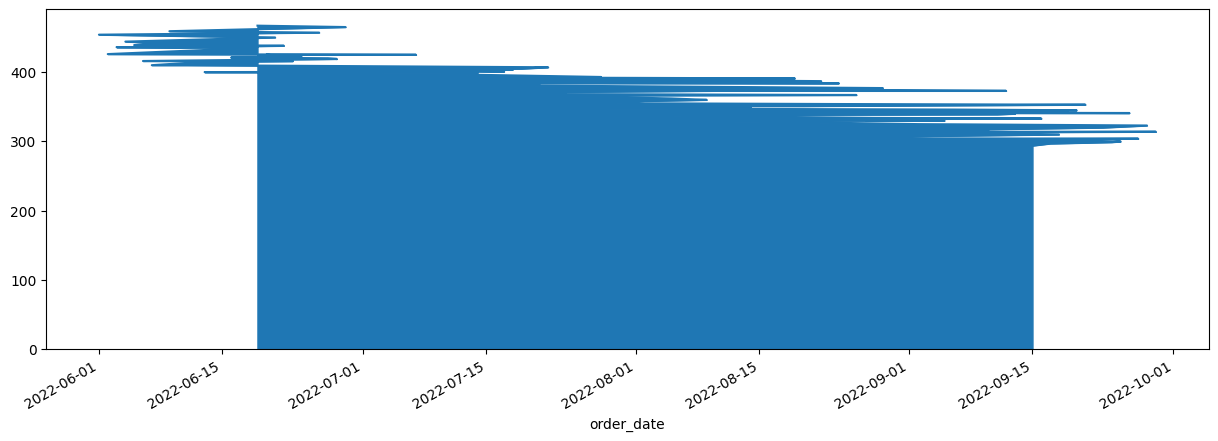

In [89]:
df['order_date'].value_counts().plot(kind="area", figsize=(15, 5))

<Axes: ylabel='Frequency'>

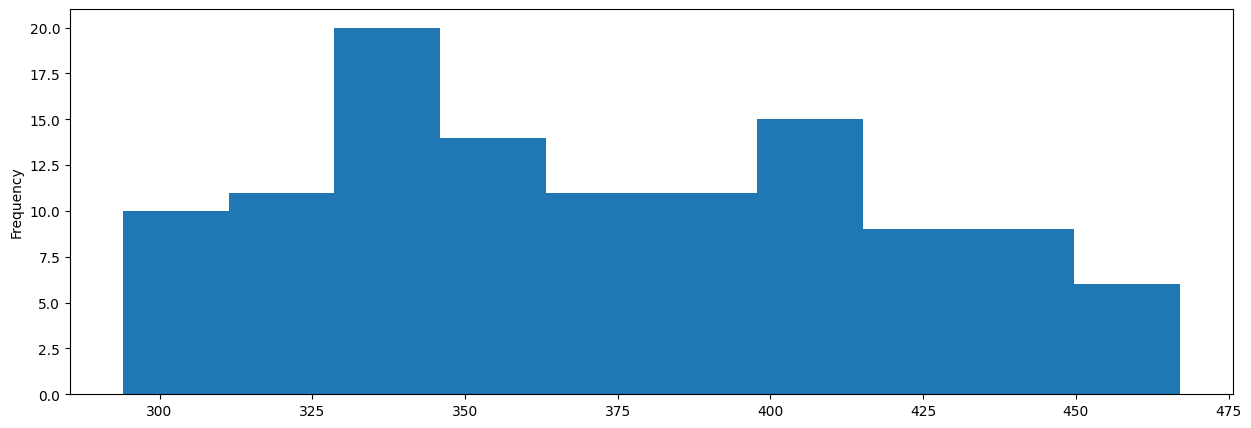

In [91]:
df['order_date'].value_counts().plot(kind="hist", figsize=(15, 5))

In [119]:
import pandas as pd

# Assuming your DataFrame is named df_orders

df_orders = df.copy()

# Convert order_date to datetime if it's not already
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Group by month of order_date and calculate aggregate statistics
df_orders_grouped = df_orders.groupby(pd.Grouper(key='order_date', freq='M')).agg({
    'order_id': 'count',         # Count of orders
    'total_price': 'sum',        # Total price of orders
    'delivery_fee': 'sum',       # Total delivery fee
    'discount': 'sum',           # Total discount applied
    'final_price': 'sum',        # Total final price
    'order_rating': 'mean'       # Mean order rating
})

# Rename the columns for clarity
df_orders_grouped = df_orders_grouped.rename(columns={
    'order_id': 'total_orders',
    'total_price': 'total_sales',
    'final_price': 'total_revenue',
    'order_rating': 'average_rating'
})

# Reset the index to make the grouped column (order_date) a regular column
df_orders_grouped = df_orders_grouped.reset_index()

# Display the resulting DataFrame
df_orders_grouped

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_75639/2850430407.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_orders_grouped = df_orders.groupby(pd.Grouper(key='order_date', freq='M')).agg({


,order_date,total_orders,total_sales,delivery_fee,discount,total_revenue,average_rating
0,2022-06-30,12502,357047,38325.5,47795.0,347577.5,4.219576
1,2022-07-31,11144,316356,33975.5,41730.0,308601.5,3.719732
2,2022-08-31,10107,291485,31023.5,39142.6,283365.9,3.380809
3,2022-09-30,9365,264639,28534.5,35012.4,258161.1,3.000000


In [137]:
import pandas as pd

# Assuming your DataFrame is named df_orders

df_orders = df.copy()

# Convert order_date to datetime if it's not already
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Group by month of order_date and calculate aggregate statistics
df_orders_grouped = df_orders.groupby(pd.Grouper(key='order_date', freq='ME')).agg({
    'order_id': 'count',         # Count of orders
    'total_price': 'sum',        # Total price of orders
    'delivery_fee': 'sum',       # Total delivery fee
    'discount': 'sum',           # Total discount applied
    'final_price': 'sum',        # Total final price
    'order_rating': 'mean'       # Mean order rating
})

# Rename the columns for clarity
df_orders_grouped = df_orders_grouped.rename(columns={
    'order_id': 'total_orders',
    'total_price': 'total_sales',
    'delivery_fee': 'total_delivery_fee',
    'discount': 'total_discount',
    'final_price': 'total_revenue',
    'order_rating': 'average_rating'
})

# Reset the index to make the grouped column (order_date) a regular column
df_orders_grouped = df_orders_grouped.reset_index()

# Display the resulting DataFrame
df_orders_grouped

,order_date,total_orders,total_sales,total_delivery_fee,total_discount,total_revenue,average_rating
0,2022-06-30,12502,357047,38325.5,47795.0,347577.5,4.219576
1,2022-07-31,11144,316356,33975.5,41730.0,308601.5,3.719732
2,2022-08-31,10107,291485,31023.5,39142.6,283365.9,3.380809
3,2022-09-30,9365,264639,28534.5,35012.4,258161.1,3.000000


In [122]:
# Assuming your DataFrame is named df_orders

df_orders = df.copy()

# Convert order_date to datetime if it's not already
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Create a new column for month names
df_orders['month_name'] = df_orders['order_date'].dt.strftime('%B')


# Group by month name and calculate aggregate statistics
df_orders_grouped = df_orders.groupby('month_name').agg({
    'order_id': 'count',         # Count of orders
    'total_price': 'sum',        # Total price of orders
    'delivery_fee': 'sum',       # Total delivery fee
    'discount': 'sum',           # Total discount applied
    'final_price': 'sum',        # Total final price
    'order_rating': 'mean'       # Mean order rating
})

# Rename the columns for clarity
df_orders_grouped = df_orders_grouped.rename(columns={
    'order_id': 'total_orders',
    'total_price': 'total_sales',
    'final_price': 'total_revenue',
    'order_rating': 'average_rating'
})

# Reset the index to make the grouped column (month_name) a regular column
df_orders_grouped = df_orders_grouped.reset_index()

# Display the resulting DataFrame
df_orders_grouped

,month_name,total_orders,total_sales,delivery_fee,discount,total_revenue,average_rating
0,August,10107,291485,31023.5,39142.6,283365.9,3.380809
1,July,11144,316356,33975.5,41730.0,308601.5,3.719732
2,June,12502,357047,38325.5,47795.0,347577.5,4.219576
3,September,9365,264639,28534.5,35012.4,258161.1,3.000000


<Axes: >

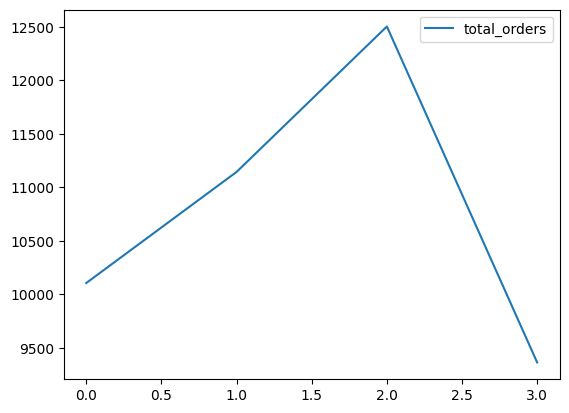

In [123]:
df_orders_grouped[["month_name", "total_orders"]].plot()

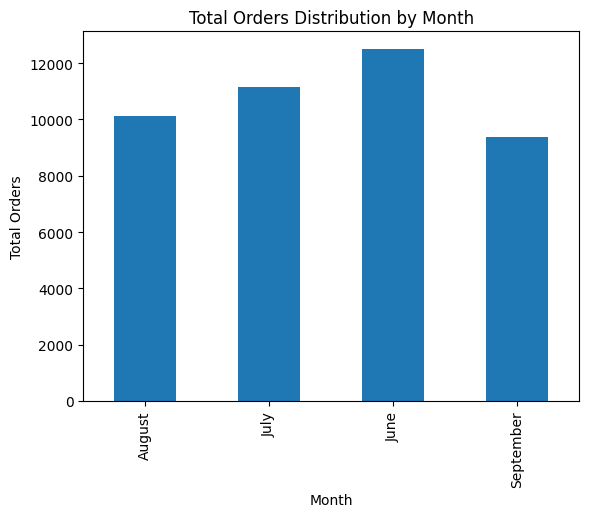

In [124]:
# Plot the distribution of total orders by month as a bar chart
df_orders_grouped[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month')

# Show the plot
plt.show()

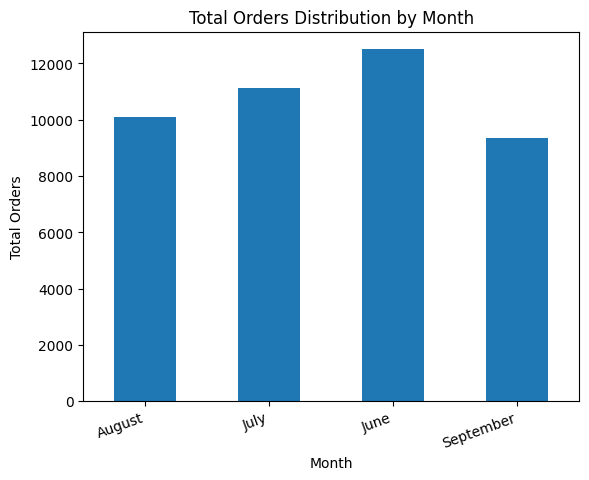

In [125]:
# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped['month_name'], rotation=20, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month')

# Show the plot
plt.show()

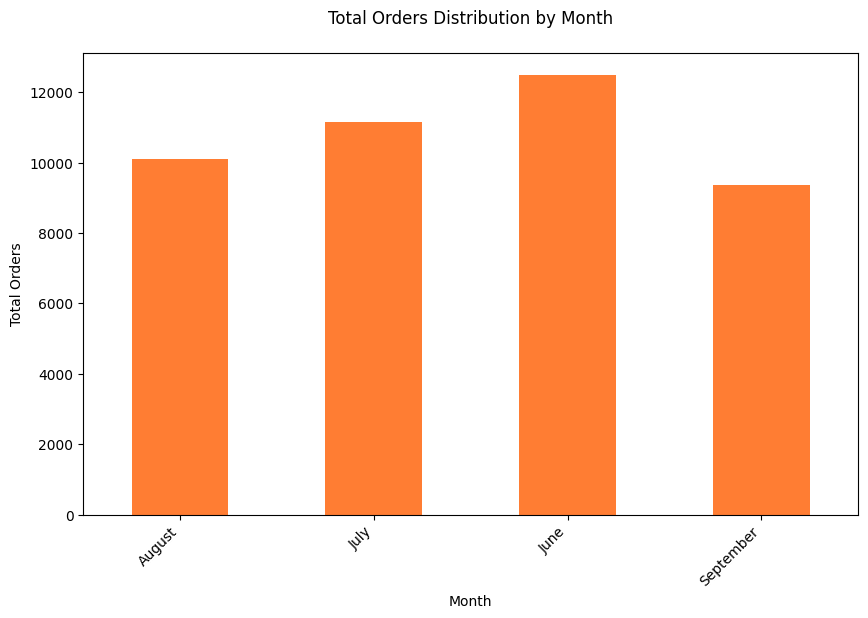

In [128]:
import matplotlib.pyplot as plt


# Define color for bars
# color = 'skyblue'

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#FF7D33'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped[["month_name", "total_orders"]].plot(kind='bar', 
                                                            x='month_name', 
                                                            y='total_orders', 
                                                            legend=None,
                                                            color=color,
                                                            figsize=(10, 6))

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month\n')

# Show the plot
plt.show()


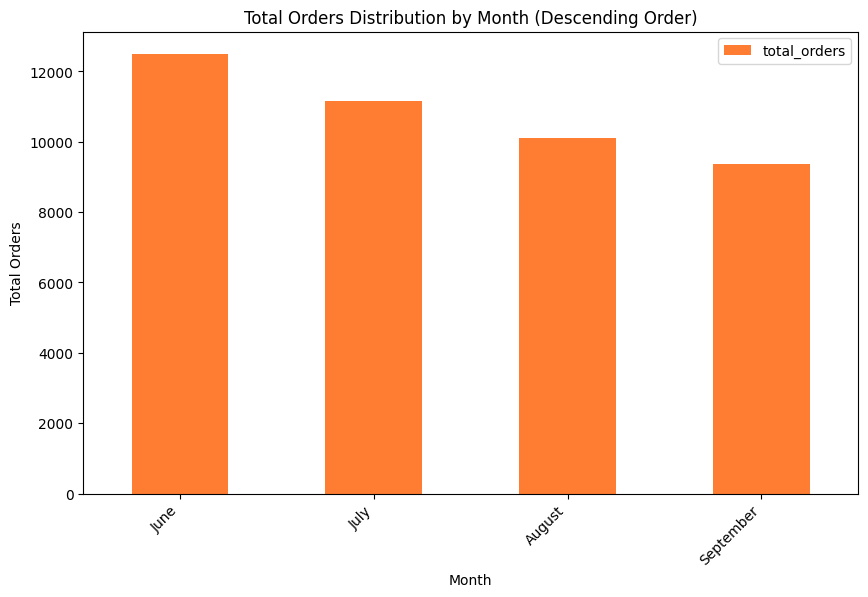

In [129]:
import matplotlib.pyplot as plt

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_orders', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#FF7D33'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=True, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order)')

# Show the plot
plt.show()


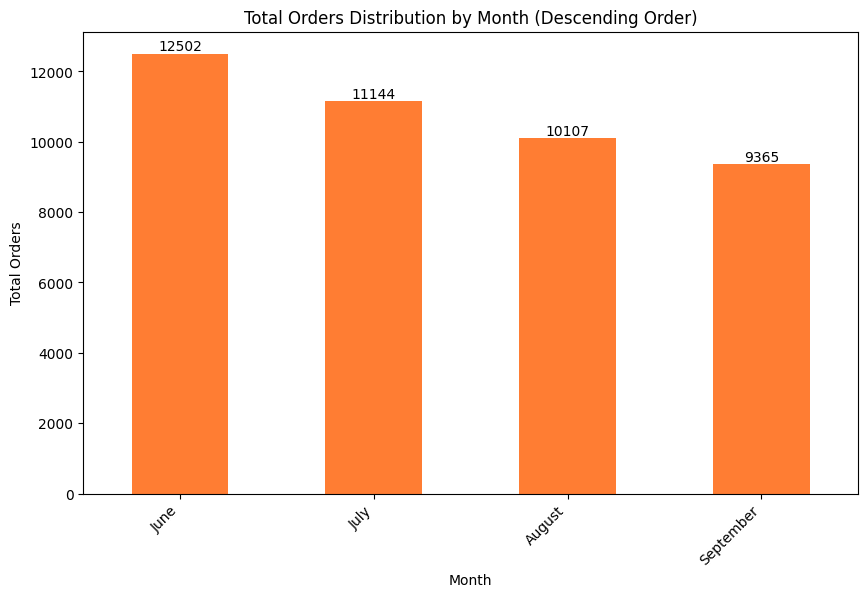

In [130]:
import matplotlib.pyplot as plt

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_orders', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#FF7D33'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order)')

# Add total orders on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

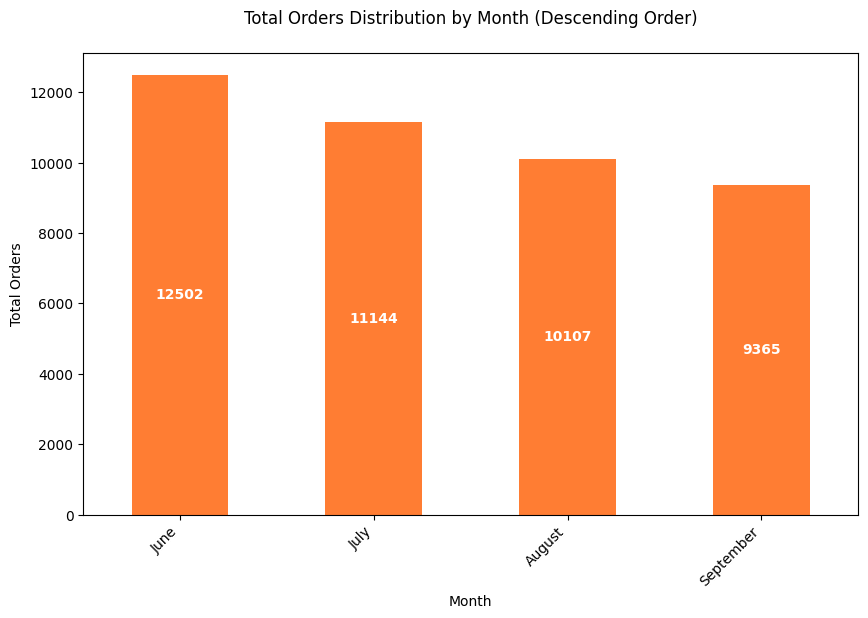

In [131]:
import matplotlib.pyplot as plt

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_orders', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#FF7D33'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order)\n')

# Add total orders inside each bar with white color
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', 
                                                                                            color='white', weight='bold')

# Show the plot
plt.show()


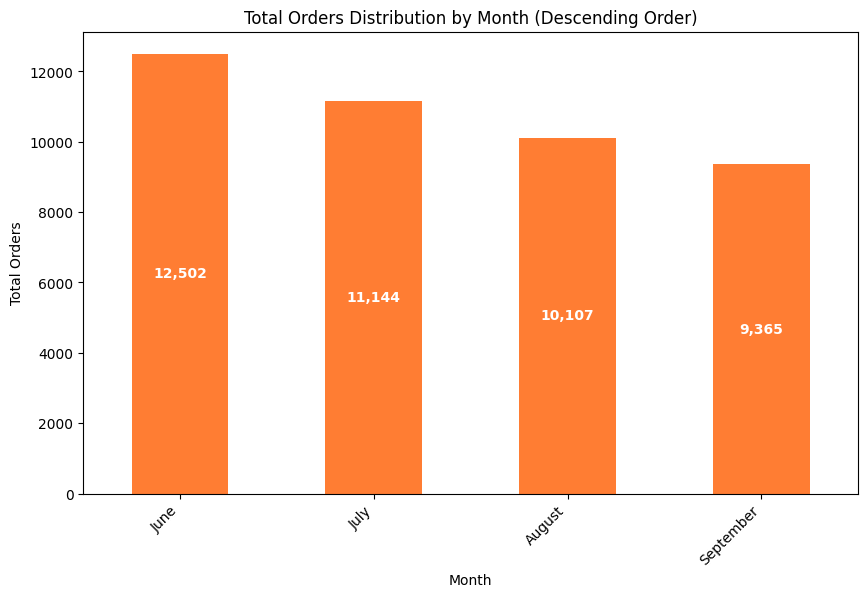

In [132]:
import matplotlib.pyplot as plt

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_orders', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#FF7D33'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order)')

# Add total orders inside each bar with white color and bold text
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', color='white', weight='bold')

# Show the plot
plt.show()


In [109]:
#!pip install numpy
#!pip install scikit-learn

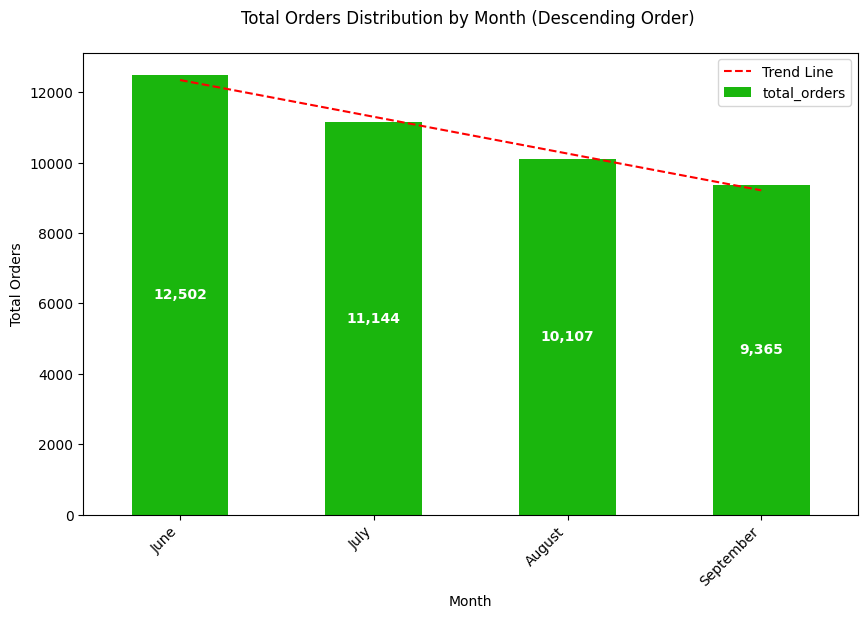

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_orders', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#1AB60D'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_orders"]].plot(kind='bar', x='month_name', y='total_orders', legend=None, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order) \n')

# Add total orders inside each bar with white color and bold text
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', color='white', weight='bold')

# Fit a linear regression model
X = np.arange(len(df_orders_grouped_sorted)).reshape(-1, 1)
y = df_orders_grouped_sorted['total_orders'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Predict trend line values
trend_line = model.predict(X)

# Plot the trend line
plt.plot(X, trend_line, color='red', linestyle='--', label='Trend Line')

# Show the plot
plt.legend()
plt.show()

## In this code:

- We fit a linear regression model to the data to capture the trend in total orders over time.
- We use the predict() method of the fitted model to obtain the predicted values of the trend line.
- We plot the trend line using plt.plot() along with the bar chart.

This will help evidence the downward trend of sales by visualizing the trend line along with the total orders distribution.

In [134]:
df_orders_grouped_sorted

,month_name,total_orders,total_sales,delivery_fee,discount,total_revenue,average_rating
2,June,12502,357047,38325.5,47795.0,347577.5,4.219576
1,July,11144,316356,33975.5,41730.0,308601.5,3.719732
0,August,10107,291485,31023.5,39142.6,283365.9,3.380809
3,September,9365,264639,28534.5,35012.4,258161.1,3.000000


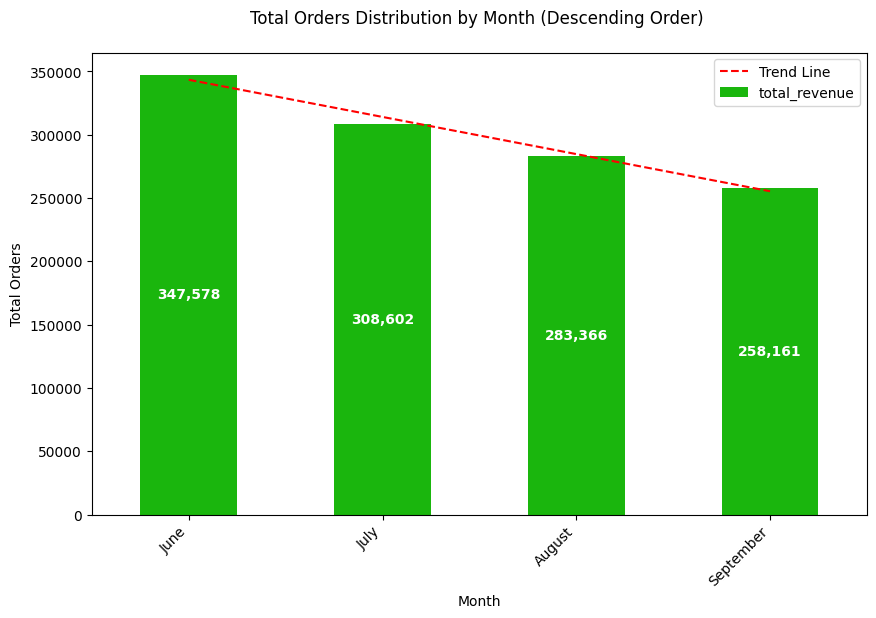

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sort the DataFrame by total_orders in descending order
df_orders_grouped_sorted = df_orders_grouped.sort_values(by='total_revenue', ascending=False)

# Define hexadecimal color code for bars (e.g., '#1f77b4' for blue)
color = '#1AB60D'

# Plot the distribution of total orders by month as a bar chart
ax = df_orders_grouped_sorted[["month_name", "total_revenue"]].plot(kind='bar', x='month_name', y='total_revenue', legend=None, figsize=(10, 6), color=color)

# Rotate x-axis labels
ax.set_xticklabels(df_orders_grouped_sorted['month_name'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Distribution by Month (Descending Order) \n')

# Add total orders inside each bar with white color and bold text
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', color='white', weight='bold')

# Fit a linear regression model
X = np.arange(len(df_orders_grouped_sorted)).reshape(-1, 1)
y = df_orders_grouped_sorted['total_revenue'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Predict trend line values
trend_line = model.predict(X)

# Plot the trend line
plt.plot(X, trend_line, color='red', linestyle='--', label='Trend Line')

# Show the plot
plt.legend()
plt.show()

In [139]:
# Assuming your DataFrame is named df_orders

df_orders = df.copy()

# Convert order_date to datetime if it's not already
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Create a new column for month names
df_orders['month_name'] = df_orders['order_date'].dt.strftime('%B')

# Create a new column for day of the week names
df_orders['day_of_week'] = df_orders['order_date'].dt.day_name()


# Group by month name and calculate aggregate statistics
df_orders_grouped = df_orders.groupby('day_of_week').agg({
    'order_id': 'count',         # Count of orders
    'total_price': 'sum',        # Total price of orders
    'delivery_fee': 'sum',       # Total delivery fee
    'discount': 'sum',           # Total discount applied
    'final_price': 'sum',        # Total final price
    'order_rating': 'mean'       # Mean order rating
})

# Rename the columns for clarity
df_orders_grouped = df_orders_grouped.rename(columns={
    'order_id': 'total_orders',
    'total_price': 'total_sales',
    'final_price': 'total_revenue',
    'order_rating': 'average_rating'
})

# Reset the index to make the grouped column (month_name) a regular column
df_orders_grouped = df_orders_grouped.reset_index()

# Display the resulting DataFrame
df_orders_grouped

,day_of_week,total_orders,total_sales,delivery_fee,discount,total_revenue,average_rating
0,Friday,6441,180613,19775.0,23564.6,176823.4,3.628165
1,Monday,6327,176494,19578.0,23283.2,172788.8,3.594237
2,Saturday,5760,166901,17331.0,22411.4,161820.6,3.653379
3,Sunday,5946,170049,18283.5,22870.2,165462.3,3.630064
4,Thursday,6248,179721,18921.5,23824.2,174818.3,3.618227
5,Tuesday,5890,169461,17883.0,22493.8,164850.2,3.613575
6,Wednesday,6506,186288,20087.0,25232.6,181142.4,3.664688


In [151]:
df_orders = df.copy()

# Create a new column for month names
df_orders['month_name'] = df_orders['order_date'].dt.strftime('%B')

# Create a new column for day of the week names
df_orders['day_of_week'] = df_orders['order_date'].dt.day_name()

# Group by both month names and day of the week names and calculate some aggregate statistics
df_orders_grouped_month_day = df_orders.groupby(['month_name', 'day_of_week']).agg({
    'order_id': 'count',         # Count of orders
    'total_price': 'sum',        # Total price of orders
    'delivery_fee': 'sum',       # Total delivery fee
    'discount': 'sum',           # Total discount applied
    'final_price': 'sum',        # Total final price
    'order_rating': 'mean'       # Mean order rating
})



# Rename the columns for clarity
df_orders_grouped_month_day = df_orders_grouped_month_day.rename(columns={
    'order_id': 'total_orders',
    'total_price': 'total_sales',
    'final_price': 'total_revenue',
    'order_rating': 'average_rating'
})


# Display the grouped DataFrame
#print(df_orders_grouped_month_day)
df_orders_grouped_month_day

total_orders  total_sales  delivery_fee  discount  \
month_name day_of_week                                                      
August     Friday               1465        41869        4651.0    5659.6   
           Monday               1721        48758        5243.0    6377.0   
           Saturday             1360        40126        4054.5    5506.6   
           Sunday               1363        40501        4120.0    5515.2   
           Thursday             1349        38334        4194.0    5103.2   
           Tuesday              1409        40432        4315.5    5416.2   
           Wednesday            1440        41465        4445.5    5564.8   
July       Friday               1954        54052        5913.0    7022.6   
           Monday               1558        43300        4743.0    5742.0   
           Saturday             1504        42817        4614.5    5736.0   
           Sunday               1544        42648        4773.0    5508.4   
           Thursday             1600        46524        4833.0    6016.0   
           Tuesday              1452        42499        4418.5    5633.4   
           Wednesday            1532        44516        4680.5    6071.6   
June       Friday               1728        48591        5304.0    6254.4   
           Monday               1661        46484        5197.0    6125.8   
           Saturday             1682        48610        5033.0    6436.8   
           Sunday               1777        51295        5471.0    7052.4   
           Thursday             1722        49431        5213.0    6647.0   
           Tuesday              1694        48160        5185.5    6425.0   
           Wednesday            2238        64476        6922.0    8853.6   
September  Friday               1294        36101        3907.0    4628.0   
           Monday               1387        37952        4395.0    5038.4   
           Saturday             1214        35348        3629.0    4732.0   
           Sunday               1262        35605        3919.5    4794.2   
           Thursday             1577        45432        4681.5    6058.0   
           Tuesday              1335        38370        3963.5    5019.2   
           Wednesday            1296        35831        4039.0    4742.6   

                        total_revenue  average_rating  
month_name day_of_week                                 
August     Friday             40860.4        3.386417  
           Monday             47624.0        3.387825  
           Saturday           38673.9        3.418879  
           Sunday             39105.8        3.338407  
           Thursday           37424.8        3.383801  
           Tuesday            39331.3        3.341615  
           Wednesday          40345.7        3.406447  
July       Friday             52942.4        3.720671  
           Monday             42301.0        3.721193  
           Saturday           41695.5        3.762940  
           Sunday             41912.6        3.708105  
           Thursday           45341.0        3.706994  
           Tuesday            41284.1        3.715090  
           Wednesday          43124.9        3.704050  
June       Friday             47640.6        4.200929  
           Monday             45555.2        4.238076  
           Saturday           47206.2        4.211606  
           Sunday             49713.6        4.218318  
           Thursday           47997.0        4.230546  
           Tuesday            46920.5        4.214417  
           Wednesday          62544.4        4.222696  
September  Friday             35380.0        2.997305  
           Monday             37308.6        2.936718  
           Saturday           34245.0        3.006924  
           Sunday             34730.3        3.021272  
           Thursday           44055.5        3.060077  
           Tuesday            37314.3        3.027783  
           Wednesday          35127.4        2.941495

In [152]:
# Define the custom order for the days of the week
custom_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the DataFrame by month_name and day_of_week using the custom order
df_orders_grouped_month_day_sorted = df_orders_grouped_month_day.reindex(index=pd.MultiIndex.from_product([df_orders['month_name'].unique(), custom_day_order]))

# Display the sorted grouped DataFrame
df_orders_grouped_month_day_sorted

total_orders  total_sales  delivery_fee  discount  \
June      Monday             1661        46484        5197.0    6125.8   
          Tuesday            1694        48160        5185.5    6425.0   
          Wednesday          2238        64476        6922.0    8853.6   
          Thursday           1722        49431        5213.0    6647.0   
          Friday             1728        48591        5304.0    6254.4   
          Saturday           1682        48610        5033.0    6436.8   
          Sunday             1777        51295        5471.0    7052.4   
July      Monday             1558        43300        4743.0    5742.0   
          Tuesday            1452        42499        4418.5    5633.4   
          Wednesday          1532        44516        4680.5    6071.6   
          Thursday           1600        46524        4833.0    6016.0   
          Friday             1954        54052        5913.0    7022.6   
          Saturday           1504        42817        4614.5    5736.0   
          Sunday             1544        42648        4773.0    5508.4   
August    Monday             1721        48758        5243.0    6377.0   
          Tuesday            1409        40432        4315.5    5416.2   
          Wednesday          1440        41465        4445.5    5564.8   
          Thursday           1349        38334        4194.0    5103.2   
          Friday             1465        41869        4651.0    5659.6   
          Saturday           1360        40126        4054.5    5506.6   
          Sunday             1363        40501        4120.0    5515.2   
September Monday             1387        37952        4395.0    5038.4   
          Tuesday            1335        38370        3963.5    5019.2   
          Wednesday          1296        35831        4039.0    4742.6   
          Thursday           1577        45432        4681.5    6058.0   
          Friday             1294        36101        3907.0    4628.0   
          Saturday           1214        35348        3629.0    4732.0   
          Sunday             1262        35605        3919.5    4794.2   

                     total_revenue  average_rating  
June      Monday           45555.2        4.238076  
          Tuesday          46920.5        4.214417  
          Wednesday        62544.4        4.222696  
          Thursday         47997.0        4.230546  
          Friday           47640.6        4.200929  
          Saturday         47206.2        4.211606  
          Sunday           49713.6        4.218318  
July      Monday           42301.0        3.721193  
          Tuesday          41284.1        3.715090  
          Wednesday        43124.9        3.704050  
          Thursday         45341.0        3.706994  
          Friday           52942.4        3.720671  
          Saturday         41695.5        3.762940  
          Sunday           41912.6        3.708105  
August    Monday           47624.0        3.387825  
          Tuesday          39331.3        3.341615  
          Wednesday        40345.7        3.406447  
          Thursday         37424.8        3.383801  
          Friday           40860.4        3.386417  
          Saturday         38673.9        3.418879  
          Sunday           39105.8        3.338407  
September Monday           37308.6        2.936718  
          Tuesday          37314.3        3.027783  
          Wednesday        35127.4        2.941495  
          Thursday         44055.5        3.060077  
          Friday           35380.0        2.997305  
          Saturday         34245.0        3.006924  
          Sunday           34730.3        3.021272

In [153]:
import pandas as pd


# Assuming df_orders is your DataFrame containing order data
df_orders = df.copy()


# First, create a new column to represent the day of the week
df_orders['WDay'] = df_orders['order_date'].dt.dayofweek

# Define a function to categorize the day as "Weekend" or "Weekday"
def categorize_day(day):
    if day == 5 or day == 6:  # 5 represents Saturday, 6 represents Sunday
        return "Weekend"
    else:
        return "Weekday"

# Apply the function to the 'WDay' column and create a new column 'WDay_Category'
df_orders['WDay_Category'] = df_orders['WDay'].apply(categorize_day)

# Group by 'WDay_Category' and calculate aggregate statistics
df_summary = df_orders.groupby('WDay_Category').agg({
    'final_price': 'sum',   # Total revenue
    'order_id': 'count'     # Order count
}).rename(columns={'final_price': 'Total_Revenue', 'order_id': 'Order_Count'})

# Display the summary DataFrame
#print(df_summary)
df_summary

,Total_Revenue,Order_Count
WDay_Category,,
Weekday,870423.1,31412
Weekend,327282.9,11706


In [155]:
df_orders.head()

,order_id,customer_id,order_date,order_time,delivered_date,delivered_time,delivery_address,driver_id,total_price,delivery_fee,discount,final_price,order_rating,WDay,WDay_Category
0,1,7420,2022-06-01,0 days 00:03:00,2022-06-01,0 days 00:16:00,7 Cedar Lane,93,150,0.0,30.0,120.0,3.555464,2,Weekday
1,2,1895,2022-06-01,0 days 00:04:00,2022-06-01,0 days 00:18:00,7 Lexington Place,138,9,5.0,0.0,14.0,5.000000,2,Weekday
2,3,6651,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:20:00,20 Linden Lane,187,117,0.0,23.4,93.6,3.393489,2,Weekday
3,4,9032,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:24:00,6 Rosedale Avenue,10,105,0.0,21.0,84.0,5.000000,2,Weekday
4,5,2479,2022-06-01,0 days 00:06:00,2022-06-01,0 days 00:34:00,36 Cherrywood Lane,219,27,2.5,5.4,24.1,3.793048,2,Weekday


In [157]:
df_orders[df_orders["order_date"] == "2022-09-01"]

,order_id,customer_id,order_date,order_time,delivered_date,delivered_time,delivery_address,driver_id,total_price,delivery_fee,discount,final_price,order_rating,WDay,WDay_Category
33753,33754,7848,2022-09-01,0 days 00:03:00,2022-09-01,0 days 00:31:00,20 Grant Avenue,100,20,3.0,2.0,21.0,1.966997,3,Weekday
33754,33755,980,2022-09-01,0 days 00:04:00,2022-09-01,0 days 00:31:00,19 Northview Terrace,105,16,5.0,1.6,19.4,2.923720,3,Weekday
33755,33756,4267,2022-09-01,0 days 00:11:00,2022-09-01,0 days 00:35:00,23 Jefferson Lane,35,42,0.0,8.4,33.6,3.631525,3,Weekday
33756,33757,7784,2022-09-01,0 days 00:13:00,2022-09-01,0 days 00:42:00,29 Fairview Drive,211,66,0.0,13.2,52.8,3.583224,3,Weekday
33757,33758,2623,2022-09-01,0 days 00:47:00,2022-09-01,0 days 01:18:00,49 Greenfield Terrace,41,16,5.0,0.0,21.0,1.201833,3,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,34081,4086,2022-09-01,0 days 21:49:00,2022-09-01,0 days 22:17:00,8 Vineyard Drive,199,36,0.0,7.2,28.8,4.730445,3,Weekday
34081,34082,3265,2022-09-01,0 days 21:50:00,2022-09-01,0 days 22:19:00,51 Locust Lane,19,108,0.0,21.6,86.4,1.813691,3,Weekday
34082,34083,861,2022-09-01,0 days 21:53:00,2022-09-01,0 days 22:22:00,20 Broad Street,98,7,5.0,0.0,12.0,2.728837,3,Weekday
34083,34084,6881,2022-09-01,0 days 21:54:00,2022-09-01,0 days 22:23:00,18 Parkside Lane,174,48,0.0,9.6,38.4,1.337142,3,Weekday


In [159]:
# Filter the DataFrame to include only rows between 15-09-2022 and 30-09-2022
mask = (df_orders['order_date'] >= '2022-09-15') & (df_orders['order_date'] <= '2022-09-30')
filtered_df = df_orders[mask]

# Calculate the total revenue for the filtered DataFrame
total_revenue = filtered_df['final_price'].sum()

# Print the total revenue
print("Total revenue between 15-09-2022 and 30-09-2022:", total_revenue)

Total revenue between 15-09-2022 and 30-09-2022: 131826.59999999998


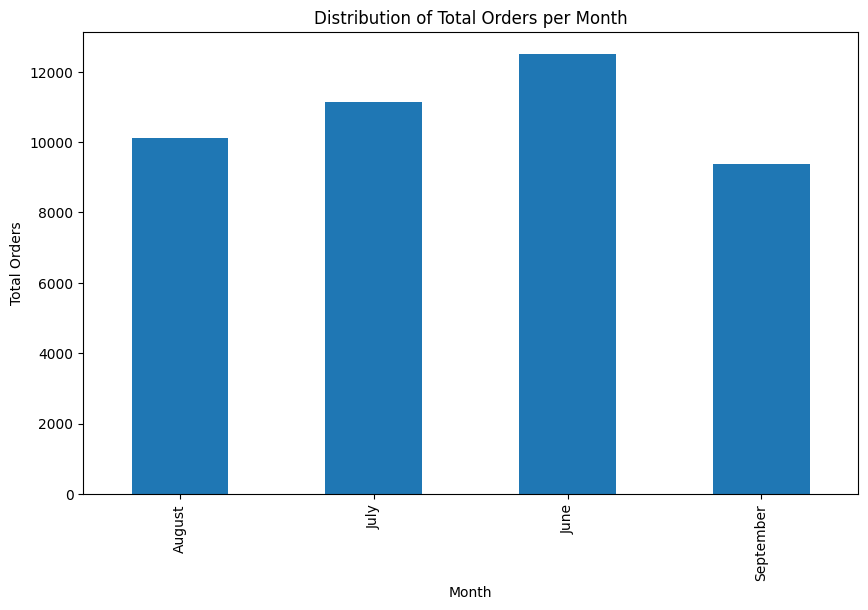

In [67]:
import matplotlib.pyplot as plt

# Assuming df_orders_grouped is your DataFrame containing the aggregated statistics

# Plot the distribution of total orders per month as a bar chart
df_orders_grouped.plot(x='month_name', y='total_orders', kind='bar', figsize=(10, 6), legend=None)

# Set the title and labels
plt.title('Distribution of Total Orders per Month')
plt.xlabel('Month')
plt.ylabel('Total Orders')

# Show the plot
plt.show()

In [ ]:
# Close cursor and connection
cursor.close()
connection.close()

In [ ]:
query = "SELECT * FROM your_table"
df = pd.read_sql(query, connection)

In [2]:
db = sq3.connect("synergix_dataset.sql")

cursor = db.cursor()

cursor.execute("SELECT * FROM sqlite_master;")

available_table=(cursor.fetchall())
available_table

[]